In [131]:
import pandas as pd

In [132]:
data_path = 'D:\pythonProject\dainstudio_tasks\ESS1-9e01_1\ESS1-9e01_1.csv'
data_df = pd.read_csv(data_path)

In [133]:
data_path = 'D:\pythonProject\dainstudio_tasks\ESS1-9e01_1\ESS1-9e01_1.csv'
data_df = pd.read_csv(data_path) 
cols = [
    'cntry', # country
    'nwspol', # News about politics and current affairs, watching, reading or listening, in minutes
    'netustm',  #  Internet use, how much time on typical day, in minutes
    'ppltrst'  #  Most people can be trusted or you can't be too careful
]

data_df = data_df[cols]

nwspol_filter = [
    7777, # Refusal
    8888, # Don't know
    9999  # No answer
]

netustm_filter = [
    6666, # Not applicable
    7777, # Refusal
    8888, # Don't know
    9999 # No answer
]

ppltrst_filter = [
    77, # Refusal
    88, # Don't know
    99 # No answer
]

# We have to remove the outlier.

data_netustm_df = data_df[~data_df.netustm.isin(netustm_filter)]
data_ppltrst_df = data_df[~data_df.ppltrst.isin(ppltrst_filter)]
data_nwspol_df = data_df[~data_df.nwspol.isin(nwspol_filter)]

In [134]:
def plot_insights(col1_name, col2_name, df1, df2):
    df1 = data_df.groupby('cntry')[[col1_name]].mean()
    df2 = data_df.groupby('cntry')[[col2_name]].mean()
    agg_join = df1.merge(df2,on='cntry')
    correlation = round(agg_join.corr().iloc[1,0],2)
    agg_join.plot.scatter(x=col1_name,y=col2_name,title=f'correlation between {col1_name} and {col2_name} is {correlation}')
    return agg_join

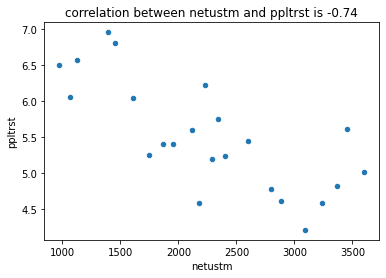

In [135]:
# Correlation between netustm: Internet use, how much time on typical day, in minutes 
# and  ppltrst: Most people can be trusted or you can't be too careful
corr_netustm_ppltrst = plot_insights('netustm','ppltrst', data_netustm_df, data_ppltrst_df)

### Insight 1: the more internet people used in europe, the less they trust the others

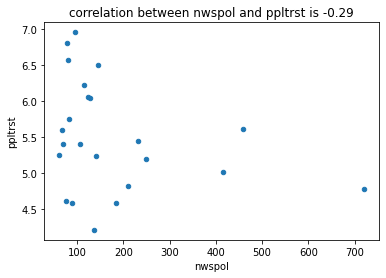

In [136]:
# Correlation between nwspol: News about politics and current affairs, watching, reading or listening, in minutes
# and  ppltrst: Most people can be trusted or you can't be too careful
corr_nwspol_ppltrst = plot_insights('nwspol','ppltrst', data_nwspol_df, data_ppltrst_df)

### Insight 2: consumption of news has also reduce the trust between people but not as strong as internet

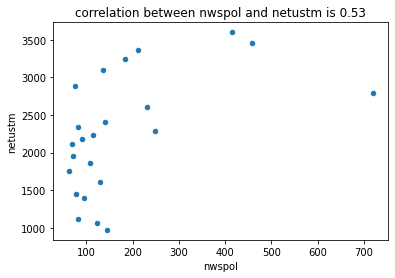

In [137]:
# Correlation between nwspol: News about politics and current affairs, watching, reading or listening, in minutes
# and  netustm: Internet use, how much time on typical day, in minutes 
corr_nwspol_netustm = plot_insights('nwspol','netustm', data_nwspol_df, data_ppltrst_df)

### Insight 3: In general, the more people used internet the more they will read news and when people read news they often do it with internet.